In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df= pd.read_csv(r"C:\Users\habib\OneDrive\المستندات\Graduation Project\GRAD-proj-DEPI\Cardiovascular Diseases Risk Prediction Dataset export 2025-10-15 21-12-56.csv")
print(display(df.head()))

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


None


In [2]:
df.shape

(308854, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

In [6]:
print(df.describe())

         Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000          

In [7]:
print(df.describe(include='object'))

       General_Health               Checkup Exercise Heart_Disease  \
count          308854                308854   308854        308854   
unique              5                     5        2             2   
top         Very Good  Within the past year      Yes            No   
freq           110395                239371   239381        283883   

       Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
count       308854       308854     308854   308854    308854  308854   
unique           2            2          2        4         2       2   
top             No           No         No       No        No  Female   
freq        278860       278976     246953   259141    207783  160196   

       Age_Category Smoking_History  
count        308854          308854  
unique           13               2  
top           65-69              No  
freq          33434          183590  


In [8]:
null = df.isnull().sum()

ratio = (null / df.shape[0]) * 100
print(ratio)

General_Health                  0.0
Checkup                         0.0
Exercise                        0.0
Heart_Disease                   0.0
Skin_Cancer                     0.0
Other_Cancer                    0.0
Depression                      0.0
Diabetes                        0.0
Arthritis                       0.0
Sex                             0.0
Age_Category                    0.0
Height_(cm)                     0.0
Weight_(kg)                     0.0
BMI                             0.0
Smoking_History                 0.0
Alcohol_Consumption             0.0
Fruit_Consumption               0.0
Green_Vegetables_Consumption    0.0
FriedPotato_Consumption         0.0
dtype: float64


In [9]:
heart_counts = df['Heart_Disease'].value_counts().reset_index()
heart_counts.columns = ['Heart_Disease', 'Count']

fig = px.pie(
    heart_counts,
    names='Heart_Disease',
    values='Count',
    title='Heart Disease Distribution',
    color_discrete_sequence=px.colors.sequential.RdBu,
    hole=0.3
)

fig.show()

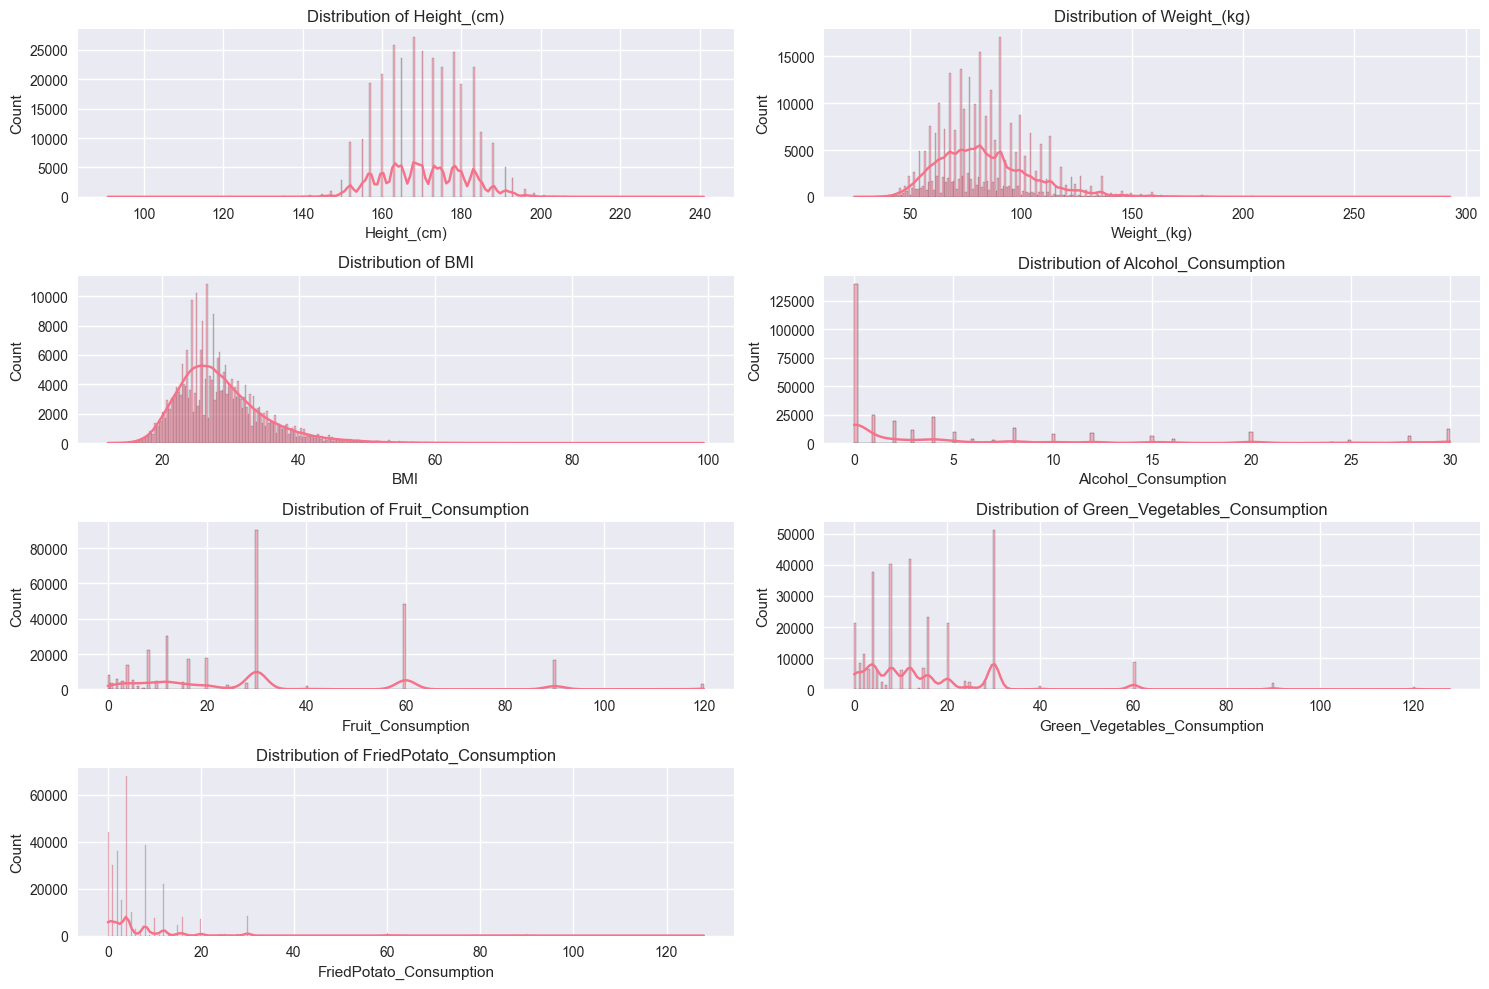

In [10]:
num_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
            'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [11]:
cat_cols = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 
            'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

# نحدد عدد الصفوف والأعمدة (زي 6x2)
fig = sp.make_subplots(rows=6, cols=2, subplot_titles=cat_cols)

# نرسم كل عمود في subplot منفصل
for i, col in enumerate(cat_cols):
    row = (i // 2) + 1
    col_pos = (i % 2) + 1
    data = df[col].value_counts().reset_index()
    data.columns = [col, 'Count']
    
    bar = go.Bar(
        x=data[col],
        y=data['Count'],
        name=col,
        marker=dict(color='rgba(93, 164, 214, 0.8)')  # لون مريح
    )
    
    fig.add_trace(bar, row=row, col=col_pos)

# تنسيق الشكل العام
fig.update_layout(
    height=2500,
    width=1000,
    title_text='Categorical Features Distribution (Interactive)',
    showlegend=False,
    template='plotly_white'
)

# تدوير أسماء الفئات لسهولة القراءة
fig.update_xaxes(tickangle=45)

fig.show()


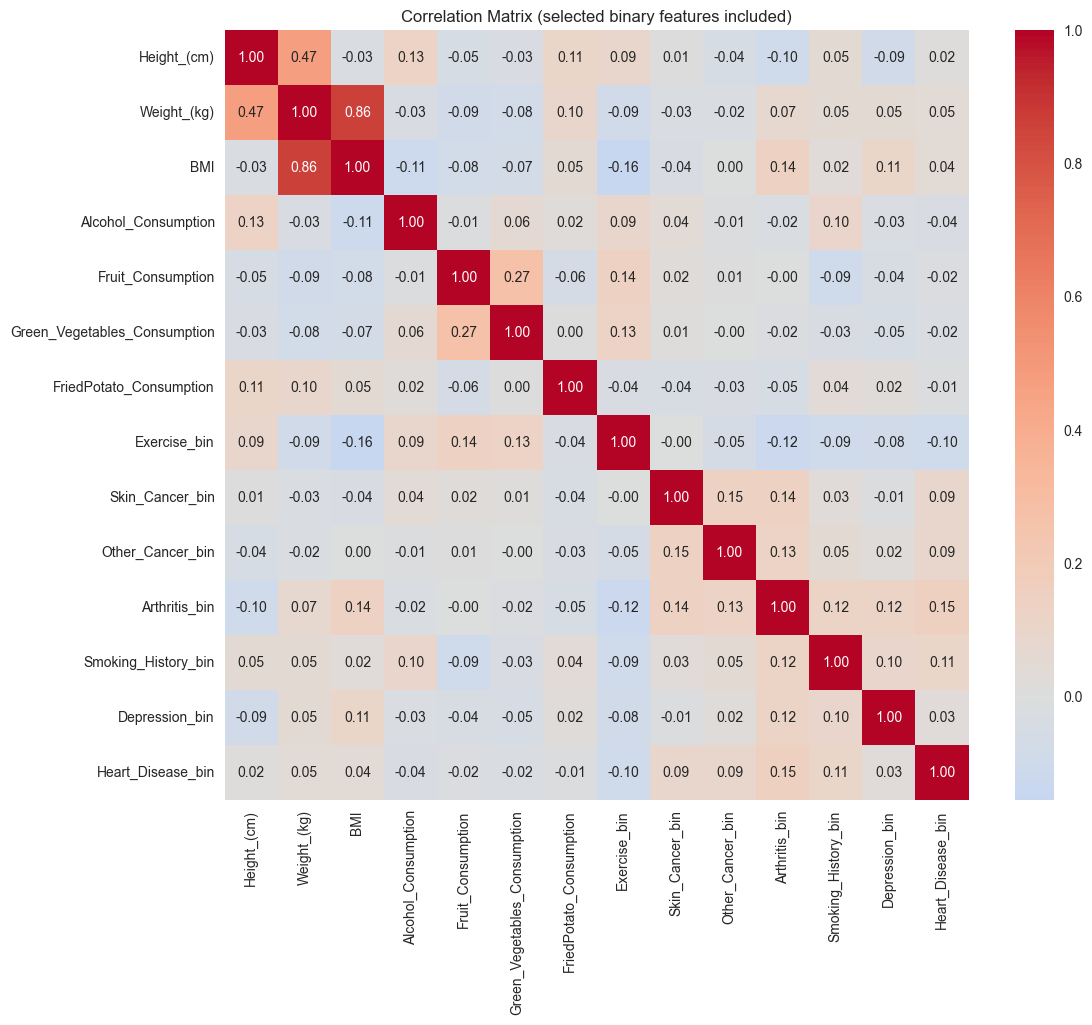

Correlations with Heart_Disease_bin (descending):
Heart_Disease_bin               1.000000
Arthritis_bin                   0.153913
Smoking_History_bin             0.107797
Other_Cancer_bin                0.092387
Skin_Cancer_bin                 0.090848
Weight_(kg)                     0.045875
BMI                             0.042666
Depression_bin                  0.032526
Height_(cm)                     0.015780
FriedPotato_Consumption        -0.009227
Fruit_Consumption              -0.020055
Green_Vegetables_Consumption   -0.024043
Alcohol_Consumption            -0.036569
Exercise_bin                   -0.096347
Name: Heart_Disease_bin, dtype: float64


In [12]:
cols_bin = ['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Arthritis', 'Smoking_History', 'Depression']

for c in cols_bin:
    if c in df.columns:
        df[c + '_bin'] = df[c].map({'Yes':1, 'No':0}).astype(int)
    else:
        raise KeyError(f"Column '{c}' not found in dataframe")

df['Heart_Disease_bin'] = df['Heart_Disease'].map({'Yes':1, 'No':0}).astype(int)

corr_cols = num_cols + [c + '_bin' for c in cols_bin] + ['Heart_Disease_bin']
df_corr = df[corr_cols].copy()

plt.figure(figsize=(12,10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix (selected binary features included)')
plt.show()

corr_with_target = df_corr.corr()['Heart_Disease_bin'].sort_values(ascending=False)
print("Correlations with Heart_Disease_bin (descending):")
print(corr_with_target)


In [13]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("Encoded Categorical Features")
df.head()

Encoded Categorical Features


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Exercise_bin,Skin_Cancer_bin,Other_Cancer_bin,Arthritis_bin,Smoking_History_bin,Depression_bin,Heart_Disease_bin
0,3,2,0,No,0,0,0,0,1,0,...,30,16,12,0,0,0,1,1,0,0
1,4,4,0,Yes,0,0,0,2,0,0,...,30,0,4,0,0,0,0,0,0,1
2,4,4,1,No,0,0,0,2,0,0,...,12,3,16,1,0,0,0,0,0,0
3,3,4,1,Yes,0,0,0,2,0,1,...,30,30,8,1,0,0,0,0,0,1
4,2,4,0,No,0,0,0,0,0,1,...,8,4,0,0,0,0,0,1,0,0


In [3]:
# BMI Category - WHO Standard (6 Classes)
def encode_bmi(bmi):
    if bmi < 18.5:
        return 0  # Underweight
    elif bmi < 25:
        return 1  # Normal
    elif bmi < 30:
        return 2  # Overweight
    elif bmi < 35:
        return 3  # Obesity Class I
    elif bmi < 40:
        return 4  # Obesity Class II
    else:
        return 5  # Obesity Class III

df['BMI_Category'] = df['BMI'].apply(encode_bmi)

print("BMI_Category added with WHO 6-class encoding!")
df[['BMI', 'BMI_Category']].head(10)

BMI_Category added with WHO 6-class encoding!


,BMI,BMI_Category
0,14.54,0
1,28.29,2
2,33.47,3
3,28.73,2
4,24.37,1
5,46.11,5
6,22.74,1
7,39.94,4
8,27.46,2
9,34.67,3


In [27]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'Exercise_bin', 'Skin_Cancer_bin', 'Other_Cancer_bin', 'Arthritis_bin',
       'Smoking_History_bin', 'Depression_bin', 'Heart_Disease_bin',
       'BMI_Category'],
      dtype='object')